In [ ]:
from google.colab import files
uploaded = files.upload()

Saving glucose_insulin_ICU.csv to glucose_insulin_ICU.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, make_scorer, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Charger les données
df = pd.read_csv("glucose_insulin_ICU.csv")
df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,LOS_ICU_days,first_ICU_stay,TIMER,STARTTIME,GLCTIMER,ENDTIME,INPUT,INPUT_HRS,INSULINTYPE,EVENT,GLC,GLCSOURCE,INFXSTOP
0,11861,192256,200010,1,True,2132-08-05 01:00:00 UTC,NaN,2132-08-05 01:00:00 UTC,NaN,NaN,NaN,NaN,NaN,149.0,FINGERSTICK,NaN
1,11861,192256,200010,1,True,2132-08-05 02:22:00 UTC,NaN,2132-08-05 02:22:00 UTC,NaN,NaN,NaN,NaN,NaN,127.0,BLOOD,NaN
2,11861,192256,200010,1,True,2132-08-05 03:22:00 UTC,NaN,2132-08-05 03:22:00 UTC,NaN,NaN,NaN,NaN,NaN,127.0,BLOOD,NaN
3,11861,192256,200010,1,True,2132-08-05 09:29:00 UTC,NaN,2132-08-05 09:29:00 UTC,NaN,NaN,NaN,NaN,NaN,247.0,FINGERSTICK,NaN
4,11861,192256,200010,1,True,2132-08-05 10:00:00 UTC,2132-08-05 10:00:00 UTC,NaN,2132-08-05 10:01:00 UTC,4.0,NaN,Short,BOLUS_INYECTION,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603759,69587,158288,299998,2,True,2181-07-07 04:04:00 UTC,NaN,2181-07-07 04:04:00 UTC,NaN,NaN,NaN,NaN,NaN,164.0,BLOOD,NaN
603760,69587,158288,299998,2,True,2181-07-07 06:00:00 UTC,NaN,2181-07-07 06:00:00 UTC,NaN,NaN,NaN,NaN,NaN,189.0,FINGERSTICK,NaN
603761,69587,158288,299998,2,True,2181-07-07 06:21:00 UTC,2181-07-07 06:21:00 UTC,NaN,2181-07-07 06:22:00 UTC,4.0,NaN,Short,BOLUS_INYECTION,NaN,NaN,0.0
603762,69587,158288,299998,2,True,2181-07-07 11:50:00 UTC,NaN,2181-07-07 11:50:00 UTC,NaN,NaN,NaN,NaN,NaN,166.0,FINGERSTICK,NaN


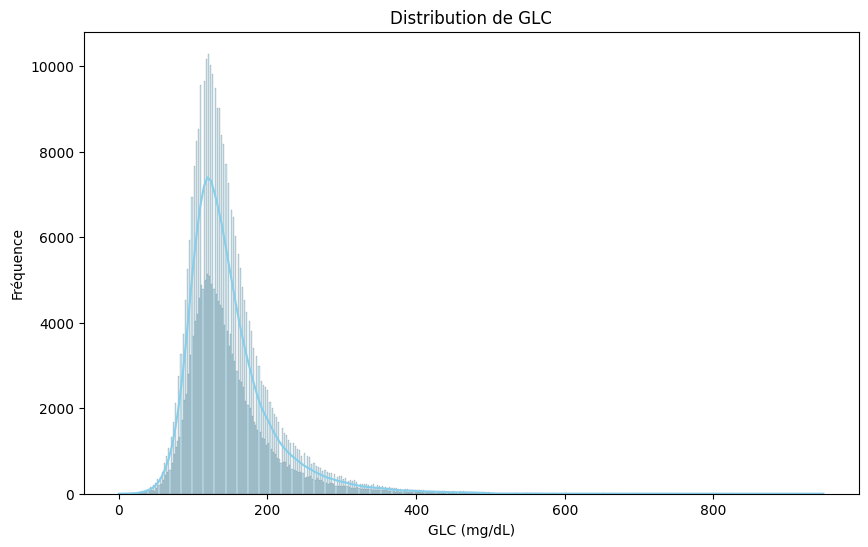

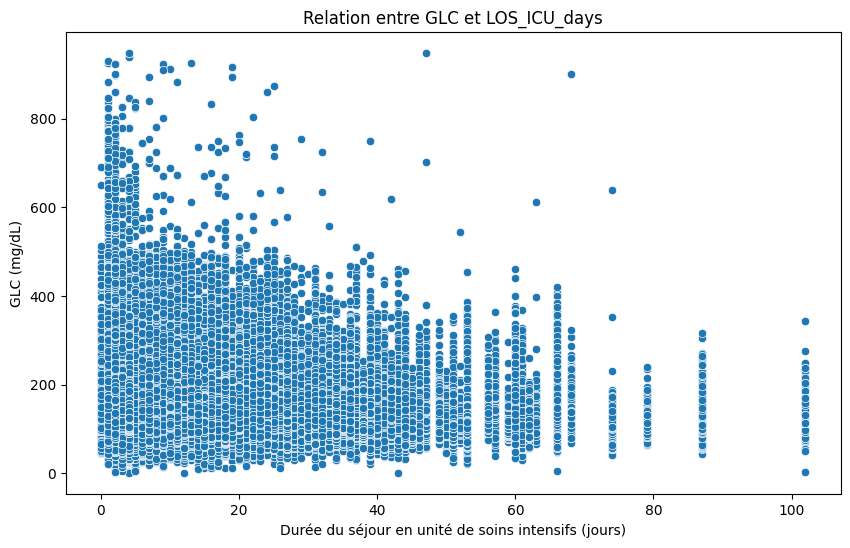

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("glucose_insulin_ICU.csv")

# Visualisation de la distribution de GLC
plt.figure(figsize=(10, 6))
sns.histplot(df['GLC'].dropna(), kde=True, color='skyblue')
plt.title('Distribution de GLC')
plt.xlabel('GLC (mg/dL)')
plt.ylabel('Fréquence')
plt.show()

# Relation entre GLC et LOS_ICU_days
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LOS_ICU_days', y='GLC', data=df)
plt.title('Relation entre GLC et LOS_ICU_days')
plt.xlabel('Durée du séjour en unité de soins intensifs (jours)')
plt.ylabel('GLC (mg/dL)')
plt.show()


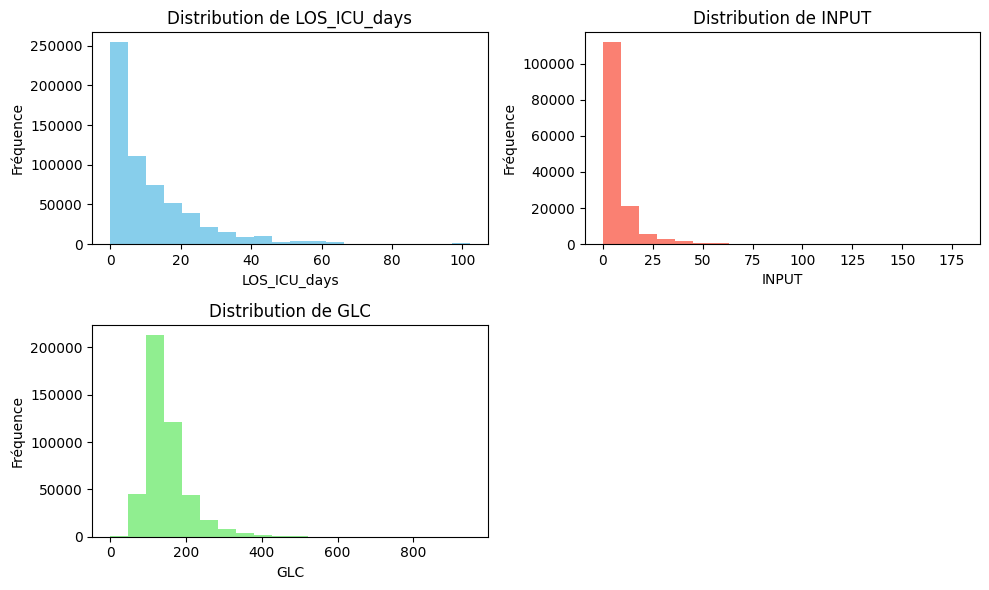

In [ ]:
import matplotlib.pyplot as plt

# Création d'histogrammes pour les variables numériques
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(df['LOS_ICU_days'], bins=20, color='skyblue')
plt.title('Distribution de LOS_ICU_days')
plt.xlabel('LOS_ICU_days')
plt.ylabel('Fréquence')

plt.subplot(2, 2, 2)
plt.hist(df['INPUT'].dropna(), bins=20, color='salmon')
plt.title('Distribution de INPUT')
plt.xlabel('INPUT')
plt.ylabel('Fréquence')

plt.subplot(2, 2, 3)
plt.hist(df['GLC'].dropna(), bins=20, color='lightgreen')
plt.title('Distribution de GLC')
plt.xlabel('GLC')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()


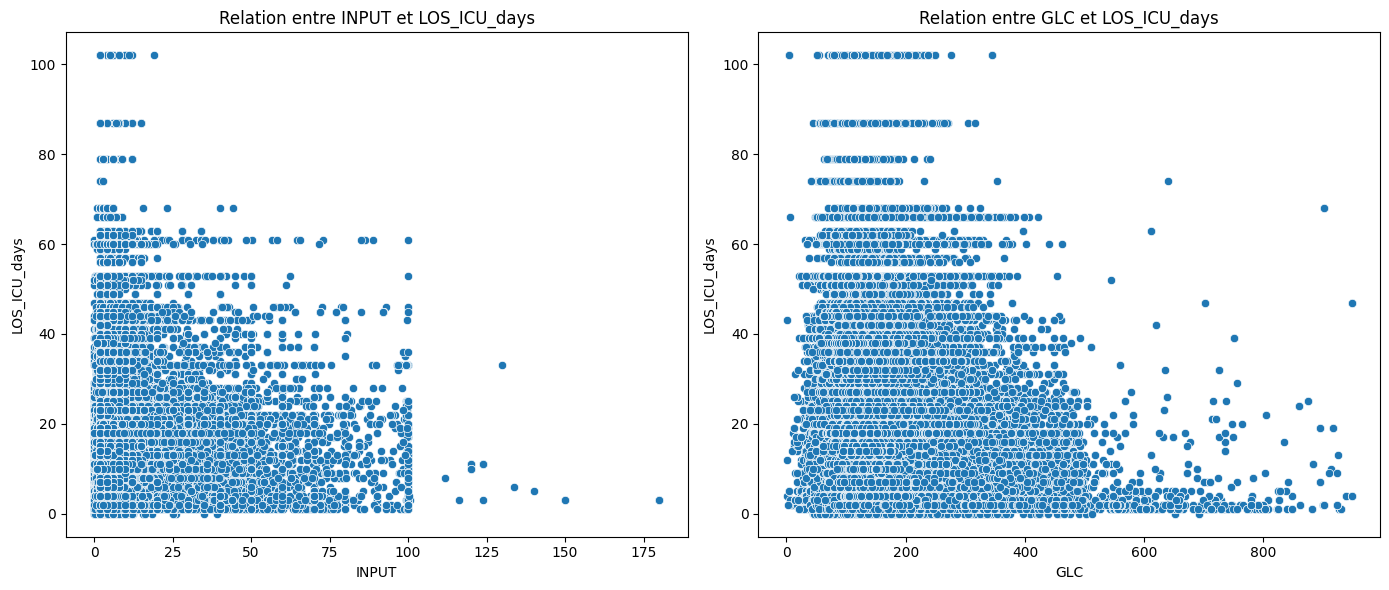

Coefficient de corrélation entre INPUT et LOS_ICU_days: 0.0444
Coefficient de corrélation entre GLC et LOS_ICU_days: -0.0596
Durée moyenne de séjour en soins intensifs pour les patients avec des niveaux élevés de GLC: 11.86 jours
Durée moyenne de séjour en soins intensifs pour les patients avec des niveaux faibles de GLC: 12.62 jours
Quantité moyenne d'insuline administrée pour les patients avec des niveaux élevés de GLC: nan
Quantité moyenne d'insuline administrée pour les patients avec des niveaux faibles de GLC: nan


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données nettoyées
df = pd.read_csv("glucose_insulin_ICU.csv")

# Création de scatter plots pour visualiser les relations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df['INPUT'], y=df['LOS_ICU_days'])
plt.title('Relation entre INPUT et LOS_ICU_days')
plt.xlabel('INPUT')
plt.ylabel('LOS_ICU_days')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['GLC'], y=df['LOS_ICU_days'])
plt.title('Relation entre GLC et LOS_ICU_days')
plt.xlabel('GLC')
plt.ylabel('LOS_ICU_days')

plt.tight_layout()
plt.show()

# Calcul des coefficients de corrélation
corr_input_icu = df['INPUT'].corr(df['LOS_ICU_days'])
corr_glc_icu = df['GLC'].corr(df['LOS_ICU_days'])

print(f"Coefficient de corrélation entre INPUT et LOS_ICU_days: {corr_input_icu:.4f}")
print(f"Coefficient de corrélation entre GLC et LOS_ICU_days: {corr_glc_icu:.4f}")

# Examiner comment les patients avec des niveaux de GLC élevés ont des séjours en soins intensifs plus longs
glc_threshold = df['GLC'].median()  # Utiliser la médiane comme seuil pour distinguer les niveaux élevés de GLC
high_glc_patients = df[df['GLC'] > glc_threshold]
low_glc_patients = df[df['GLC'] <= glc_threshold]

mean_los_high_glc = high_glc_patients['LOS_ICU_days'].mean()
mean_los_low_glc = low_glc_patients['LOS_ICU_days'].mean()

mean_input_high_glc = high_glc_patients['INPUT'].mean()
mean_input_low_glc = low_glc_patients['INPUT'].mean()

print(f"Durée moyenne de séjour en soins intensifs pour les patients avec des niveaux élevés de GLC: {mean_los_high_glc:.2f} jours")
print(f"Durée moyenne de séjour en soins intensifs pour les patients avec des niveaux faibles de GLC: {mean_los_low_glc:.2f} jours")

print(f"Quantité moyenne d'insuline administrée pour les patients avec des niveaux élevés de GLC: {mean_input_high_glc:.2f}")
print(f"Quantité moyenne d'insuline administrée pour les patients avec des niveaux faibles de GLC: {mean_input_low_glc:.2f}")


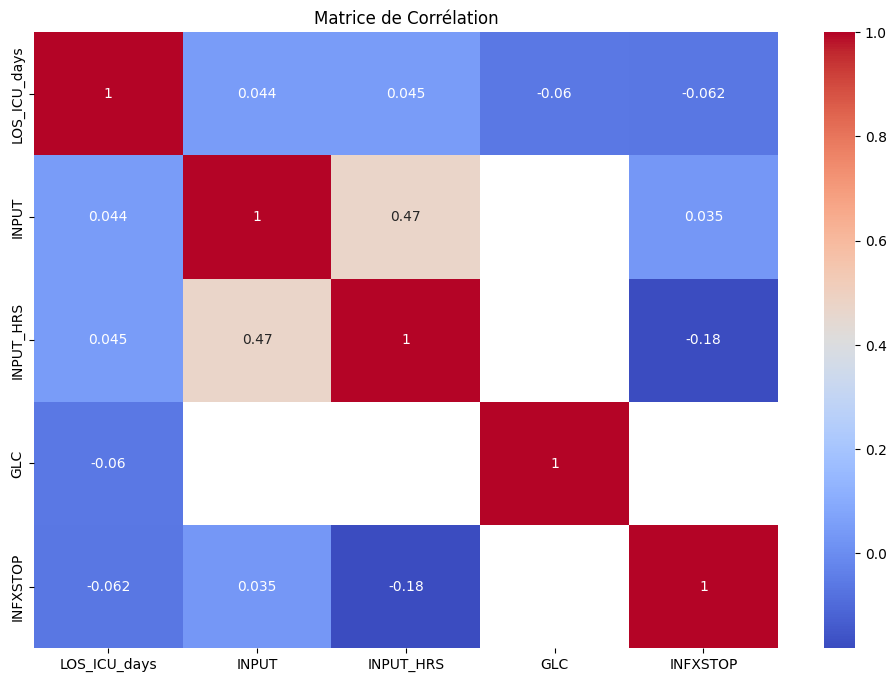

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv("glucose_insulin_ICU.csv")


# Transformation des colonnes de dates en caractéristiques numériques (exemple)
date_columns = ['STARTTIME', 'ENDTIME', 'GLCTIMER']  # Remplacez par les noms réels de vos colonnes de dates

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_hour'] = df[col].dt.hour
        df.drop(col, axis=1, inplace=True)

# Sélection des colonnes numériques pertinentes
numeric_columns = ['LOS_ICU_days', 'INPUT', 'INPUT_HRS', 'GLC', 'INFXSTOP']
df_numeric = df[numeric_columns]

# Calcul de la matrice de corrélation
corr_matrix = df_numeric.corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()





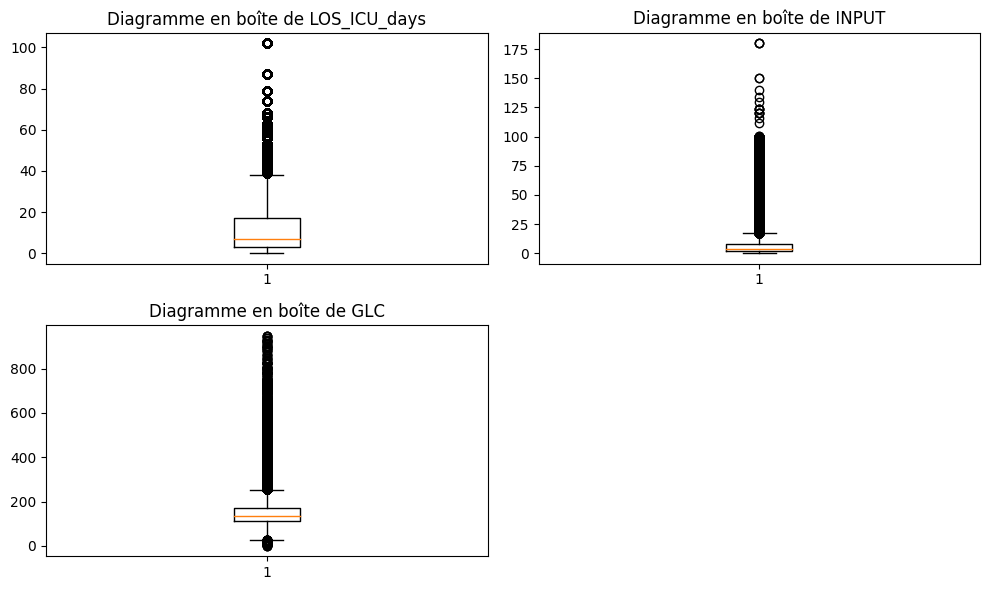

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.boxplot(df['LOS_ICU_days'].dropna())
plt.title('Diagramme en boîte de LOS_ICU_days')

plt.subplot(2, 2, 2)
plt.boxplot(df['INPUT'].dropna())
plt.title('Diagramme en boîte de INPUT')

plt.subplot(2, 2, 3)
plt.boxplot(df['GLC'].dropna())
plt.title('Diagramme en boîte de GLC')




plt.tight_layout()
plt.show()


In [ ]:
# Suppression des valeurs aberrantes
continuous_vars=['LOS_ICU_days','INPUT','GLC']

df1=df.copy()
for var in continuous_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df1 = df1[(df1[var] >= lower_bound) & (df1[var] <= upper_bound)]

In [ ]:


# Imputation des valeurs aberrantes par les limites inférieures et supérieures
for var in continuous_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[var] = np.where(df[var] < lower_bound, lower_bound, df[var])
    df[var] = np.where(df[var] > upper_bound, upper_bound, df[var])



In [ ]:


# Imputation des valeurs aberrantes par les limites inférieures et supérieures
for var in continuous_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[var] = np.where(df[var] < lower_bound, lower_bound, df[var])
    df[var] = np.where(df[var] > upper_bound, upper_bound, df[var])



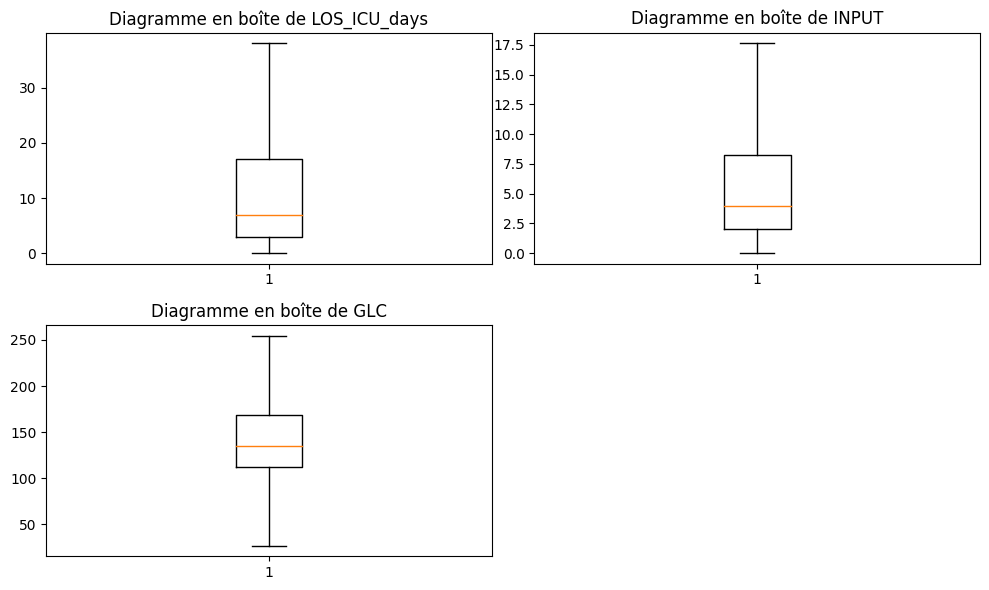

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.boxplot(df['LOS_ICU_days'].dropna())
plt.title('Diagramme en boîte de LOS_ICU_days')

plt.subplot(2, 2, 2)
plt.boxplot(df['INPUT'].dropna())
plt.title('Diagramme en boîte de INPUT')

plt.subplot(2, 2, 3)
plt.boxplot(df['GLC'].dropna())
plt.title('Diagramme en boîte de GLC')




plt.tight_layout()
plt.show()




In [ ]:

import numpy as np
# Charger les données
df = pd.read_csv("glucose_insulin_ICU.csv")

# Remplacer les valeurs "Unknown" par NaN
df.replace("Unknown", np.nan, inplace=True)

# Afficher les valeurs manquantes par colonne avant l'imputation
print("\nValeurs manquantes par colonne avant l'imputation :")
print(df.isnull().sum())



Valeurs manquantes par colonne avant l'imputation :
SUBJECT_ID             0
HADM_ID                0
ICUSTAY_ID             0
LOS_ICU_days           0
first_ICU_stay         0
TIMER                  0
STARTTIME         458086
GLCTIMER          145678
ENDTIME           458086
INPUT             458086
INPUT_HRS         559133
INSULINTYPE       458086
EVENT             458086
GLC               145678
GLCSOURCE         145678
INFXSTOP          458086
dtype: int64


In [ ]:
# Remplacer les valeurs "Unknown" par NaN
df.replace("Unknown", np.nan, inplace=True)

# Afficher les valeurs manquantes par colonne avant l'imputation
print("\nValeurs manquantes par colonne avant l'imputation :")
print(df.isnull().sum())

# Convertir les colonnes STARTTIME et GLCTIMER en types datetime
df['STARTTIME'] = pd.to_datetime(df['STARTTIME'], errors='coerce')
df['GLCTIMER'] = pd.to_datetime(df['GLCTIMER'], errors='coerce')

# Appliquer l'imputation avec forward fill pour les colonnes de datetime
df['STARTTIME'].fillna(method='ffill', inplace=True)
df['GLCTIMER'].fillna(method='ffill', inplace=True)

# Appliquer l'imputation avec backward fill pour les valeurs manquantes restantes
df['STARTTIME'].fillna(method='bfill', inplace=True)
df['GLCTIMER'].fillna(method='bfill', inplace=True)

# Pour les colonnes catégorielles, remplir les valeurs manquantes avec le mode
categorical_columns = ['INSULINTYPE', 'EVENT', 'GLCSOURCE','ENDTIME','TIMER']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Imputer les valeurs manquantes pour INPUT, INPUT_HRS et GLC
df['INPUT'].fillna(df['INPUT'].mean(), inplace=True)
df['INPUT_HRS'].fillna(df['INPUT_HRS'].median(), inplace=True)
df['GLC'].fillna(df['GLC'].median(), inplace=True)
df['INFXSTOP'].fillna(df['INFXSTOP'].median(), inplace=True)




# Afficher les valeurs manquantes par colonne après l'imputation
print("\nValeurs manquantes par colonne après l'imputation :")
print(df.isnull().sum())



Valeurs manquantes par colonne avant l'imputation :
SUBJECT_ID             0
HADM_ID                0
ICUSTAY_ID             0
LOS_ICU_days           0
first_ICU_stay         0
TIMER                  0
STARTTIME         458086
GLCTIMER          145678
ENDTIME           458086
INPUT             458086
INPUT_HRS         559133
INSULINTYPE       458086
EVENT             458086
GLC               145678
GLCSOURCE         145678
INFXSTOP          458086
dtype: int64

Valeurs manquantes par colonne après l'imputation :
SUBJECT_ID        0
HADM_ID           0
ICUSTAY_ID        0
LOS_ICU_days      0
first_ICU_stay    0
TIMER             0
STARTTIME         0
GLCTIMER          0
ENDTIME           0
INPUT             0
INPUT_HRS         0
INSULINTYPE       0
EVENT             0
GLC               0
GLCSOURCE         0
INFXSTOP          0
dtype: int64


In [ ]:
df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,LOS_ICU_days,first_ICU_stay,TIMER,STARTTIME,GLCTIMER,ENDTIME,INPUT,INPUT_HRS,INSULINTYPE,EVENT,GLC,GLCSOURCE,INFXSTOP
0,11861,192256,200010,1,True,2132-08-05 01:00:00 UTC,2132-08-05 10:00:00+00:00,2132-08-05 01:00:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,149.0,FINGERSTICK,0.0
1,11861,192256,200010,1,True,2132-08-05 02:22:00 UTC,2132-08-05 10:00:00+00:00,2132-08-05 02:22:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,127.0,BLOOD,0.0
2,11861,192256,200010,1,True,2132-08-05 03:22:00 UTC,2132-08-05 10:00:00+00:00,2132-08-05 03:22:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,127.0,BLOOD,0.0
3,11861,192256,200010,1,True,2132-08-05 09:29:00 UTC,2132-08-05 10:00:00+00:00,2132-08-05 09:29:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,247.0,FINGERSTICK,0.0
4,11861,192256,200010,1,True,2132-08-05 10:00:00 UTC,2132-08-05 10:00:00+00:00,2132-08-05 09:29:00+00:00,2132-08-05 10:01:00 UTC,4.000000,4.0,Short,BOLUS_INYECTION,135.0,FINGERSTICK,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603759,69587,158288,299998,2,True,2181-07-07 04:04:00 UTC,2181-07-06 18:10:00+00:00,2181-07-07 04:04:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,164.0,BLOOD,0.0
603760,69587,158288,299998,2,True,2181-07-07 06:00:00 UTC,2181-07-06 18:10:00+00:00,2181-07-07 06:00:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,189.0,FINGERSTICK,0.0
603761,69587,158288,299998,2,True,2181-07-07 06:21:00 UTC,2181-07-07 06:21:00+00:00,2181-07-07 06:00:00+00:00,2181-07-07 06:22:00 UTC,4.000000,4.0,Short,BOLUS_INYECTION,135.0,FINGERSTICK,0.0
603762,69587,158288,299998,2,True,2181-07-07 11:50:00 UTC,2181-07-07 06:21:00+00:00,2181-07-07 11:50:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,166.0,FINGERSTICK,0.0


In [ ]:
# Identification des colonnes catégorielles
categorical_columns = df.select_dtypes(include=['object']).columns

print("Colonnes catégorielles :")
print(categorical_columns)


Colonnes catégorielles :
Index(['TIMER', 'ENDTIME', 'INSULINTYPE', 'EVENT', 'GLCSOURCE'], dtype='object')


In [ ]:
# Afficher les valeurs uniques dans chaque colonne catégorielle
for col in categorical_columns:
    print(f"\nValeurs uniques dans la colonne {col} :")
    print(df[col].unique())


Valeurs uniques dans la colonne TIMER :
['2132-08-05 01:00:00 UTC' '2132-08-05 02:22:00 UTC'
 '2132-08-05 03:22:00 UTC' ... '2181-07-07 06:21:00 UTC'
 '2181-07-07 11:50:00 UTC' '2181-07-07 11:56:00 UTC']

Valeurs uniques dans la colonne ENDTIME :
['2167-08-10 23:01:00 UTC' '2132-08-05 10:01:00 UTC'
 '2132-08-05 16:13:00 UTC' ... '2181-07-06 18:11:00 UTC'
 '2181-07-07 06:22:00 UTC' '2181-07-07 11:57:00 UTC']

Valeurs uniques dans la colonne INSULINTYPE :
['Short' 'Long' 'Intermediate']

Valeurs uniques dans la colonne EVENT :
['BOLUS_INYECTION' 'INFUSION' 'BOLUS_PUSH']

Valeurs uniques dans la colonne GLCSOURCE :
['FINGERSTICK' 'BLOOD']


In [ ]:
# Transformation des colonnes binaires en valeurs 0 et 1
binary_columns = ['first_ICU_stay']  # Ajouter d'autres colonnes binaires identifiées

for col in binary_columns:
    df[col] = df[col].map({True: 1, False: 0})


In [ ]:
df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,LOS_ICU_days,first_ICU_stay,TIMER,STARTTIME,GLCTIMER,ENDTIME,INPUT,INPUT_HRS,INSULINTYPE,EVENT,GLC,GLCSOURCE,INFXSTOP
0,11861,192256,200010,1,1,2132-08-05 01:00:00 UTC,2132-08-05 10:00:00+00:00,2132-08-05 01:00:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,149.0,FINGERSTICK,0.0
1,11861,192256,200010,1,1,2132-08-05 02:22:00 UTC,2132-08-05 10:00:00+00:00,2132-08-05 02:22:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,127.0,BLOOD,0.0
2,11861,192256,200010,1,1,2132-08-05 03:22:00 UTC,2132-08-05 10:00:00+00:00,2132-08-05 03:22:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,127.0,BLOOD,0.0
3,11861,192256,200010,1,1,2132-08-05 09:29:00 UTC,2132-08-05 10:00:00+00:00,2132-08-05 09:29:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,247.0,FINGERSTICK,0.0
4,11861,192256,200010,1,1,2132-08-05 10:00:00 UTC,2132-08-05 10:00:00+00:00,2132-08-05 09:29:00+00:00,2132-08-05 10:01:00 UTC,4.000000,4.0,Short,BOLUS_INYECTION,135.0,FINGERSTICK,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603759,69587,158288,299998,2,1,2181-07-07 04:04:00 UTC,2181-07-06 18:10:00+00:00,2181-07-07 04:04:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,164.0,BLOOD,0.0
603760,69587,158288,299998,2,1,2181-07-07 06:00:00 UTC,2181-07-06 18:10:00+00:00,2181-07-07 06:00:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,189.0,FINGERSTICK,0.0
603761,69587,158288,299998,2,1,2181-07-07 06:21:00 UTC,2181-07-07 06:21:00+00:00,2181-07-07 06:00:00+00:00,2181-07-07 06:22:00 UTC,4.000000,4.0,Short,BOLUS_INYECTION,135.0,FINGERSTICK,0.0
603762,69587,158288,299998,2,1,2181-07-07 11:50:00 UTC,2181-07-07 06:21:00+00:00,2181-07-07 11:50:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,166.0,FINGERSTICK,0.0


In [ ]:
# Sauvegarder le fichier nettoyé
df.to_csv("INC_cleaned.csv", index=False)
# Télécharger le fichier CSV sur votre ordinateur local
files.download("INC_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Conversion des colonnes temporelles en datetime
df['TIMER'] = pd.to_datetime(df['TIMER'])
df['GLCTIMER'] = pd.to_datetime(df['GLCTIMER'])

# Feature Engineering: Ajout de nouvelles caractéristiques
df['hour'] = df['GLCTIMER'].dt.hour
df['day_of_week'] = df['GLCTIMER'].dt.dayofweek

In [ ]:
df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,LOS_ICU_days,first_ICU_stay,TIMER,STARTTIME,GLCTIMER,ENDTIME,INPUT,INPUT_HRS,INSULINTYPE,EVENT,GLC,GLCSOURCE,INFXSTOP,hour,day_of_week
0,11861,192256,200010,1,1,2132-08-05 01:00:00+00:00,2132-08-05 10:00:00+00:00,2132-08-05 01:00:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,149.0,FINGERSTICK,0.0,1,1
1,11861,192256,200010,1,1,2132-08-05 02:22:00+00:00,2132-08-05 10:00:00+00:00,2132-08-05 02:22:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,127.0,BLOOD,0.0,2,1
2,11861,192256,200010,1,1,2132-08-05 03:22:00+00:00,2132-08-05 10:00:00+00:00,2132-08-05 03:22:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,127.0,BLOOD,0.0,3,1
3,11861,192256,200010,1,1,2132-08-05 09:29:00+00:00,2132-08-05 10:00:00+00:00,2132-08-05 09:29:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,247.0,FINGERSTICK,0.0,9,1
4,11861,192256,200010,1,1,2132-08-05 10:00:00+00:00,2132-08-05 10:00:00+00:00,2132-08-05 09:29:00+00:00,2132-08-05 10:01:00 UTC,4.000000,4.0,Short,BOLUS_INYECTION,135.0,FINGERSTICK,0.0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603759,69587,158288,299998,2,1,2181-07-07 04:04:00+00:00,2181-07-06 18:10:00+00:00,2181-07-07 04:04:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,164.0,BLOOD,0.0,4,5
603760,69587,158288,299998,2,1,2181-07-07 06:00:00+00:00,2181-07-06 18:10:00+00:00,2181-07-07 06:00:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,189.0,FINGERSTICK,0.0,6,5
603761,69587,158288,299998,2,1,2181-07-07 06:21:00+00:00,2181-07-07 06:21:00+00:00,2181-07-07 06:00:00+00:00,2181-07-07 06:22:00 UTC,4.000000,4.0,Short,BOLUS_INYECTION,135.0,FINGERSTICK,0.0,6,5
603762,69587,158288,299998,2,1,2181-07-07 11:50:00+00:00,2181-07-07 06:21:00+00:00,2181-07-07 11:50:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,166.0,FINGERSTICK,0.0,11,5


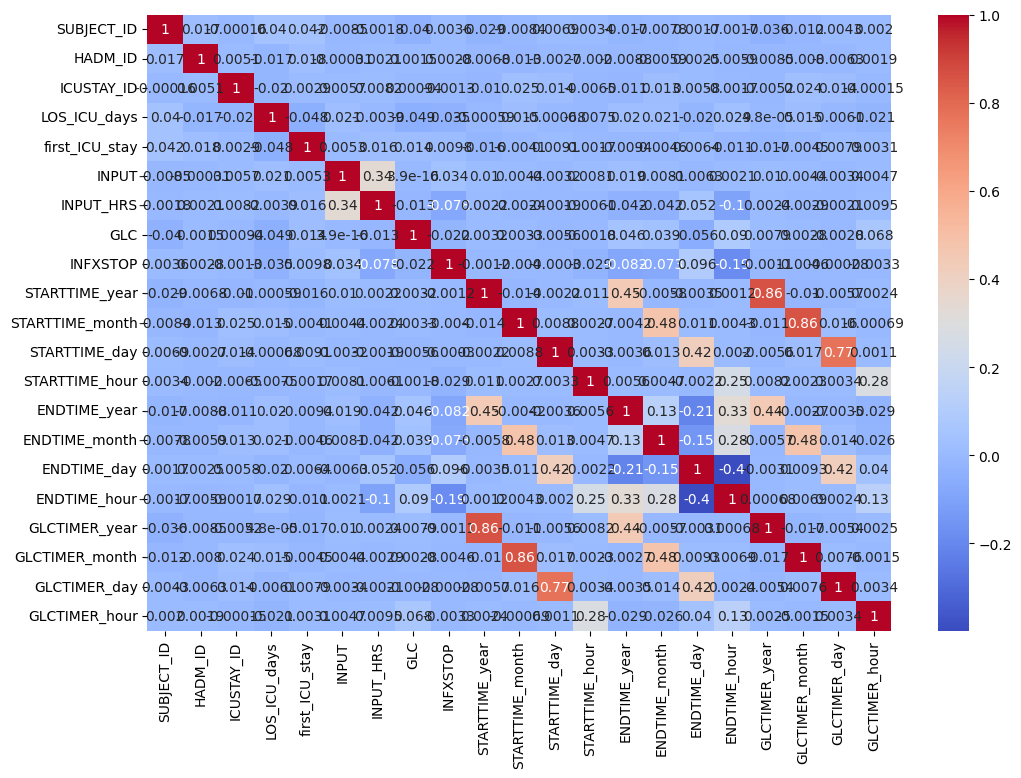

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données nettoyées
df = pd.read_csv("INC_cleaned.csv")

# Transformation des colonnes de dates en caractéristiques numériques (exemple)
date_columns = ['STARTTIME', 'ENDTIME', 'GLCTIMER']  # Remplacez par les noms réels de vos colonnes de dates

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_hour'] = df[col].dt.hour
        df.drop(col, axis=1, inplace=True)

# Supprimer les colonnes non numériques restantes
df = df.select_dtypes(include=['number'])

# Matrice de corrélation
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving INC_cleaned.csv to INC_cleaned.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
df = pd.read_csv("INC_cleaned.csv")


In [ ]:
date_columns = ['STARTTIME', 'ENDTIME', 'GLCTIMER']  # Remplacez par les noms réels de vos colonnes de dates

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_hour'] = df[col].dt.hour
        df.drop(col, axis=1, inplace=True)



In [ ]:
df = df.select_dtypes(include=['number'])


In [ ]:
X = df.drop(columns=['INPUT'])  # Variables explicatives
y = df['INPUT']  # Variable cible


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test_scaled)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erreur quadratique moyenne (MSE):", mse)
print("Erreur absolue moyenne (MAE):", mae)
print("Coefficient de détermination (R²):", r2)


Erreur quadratique moyenne (MSE): 79.86535447790526
Erreur absolue moyenne (MAE): 7.549274639815741
Coefficient de détermination (R²): -2.4053543732478193


In [ ]:
pip install mlxtend

Accuracy: 0.9420635512161188
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    111972
           1       0.79      0.28      0.41      8781

    accuracy                           0.94    120753
   macro avg       0.87      0.64      0.69    120753
weighted avg       0.93      0.94      0.93    120753

Confusion Matrix:
[[111334    638]
 [  6358   2423]]


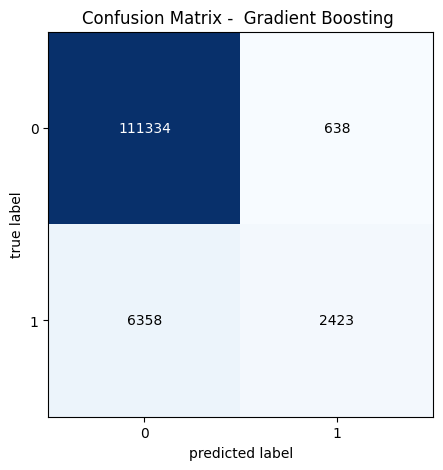

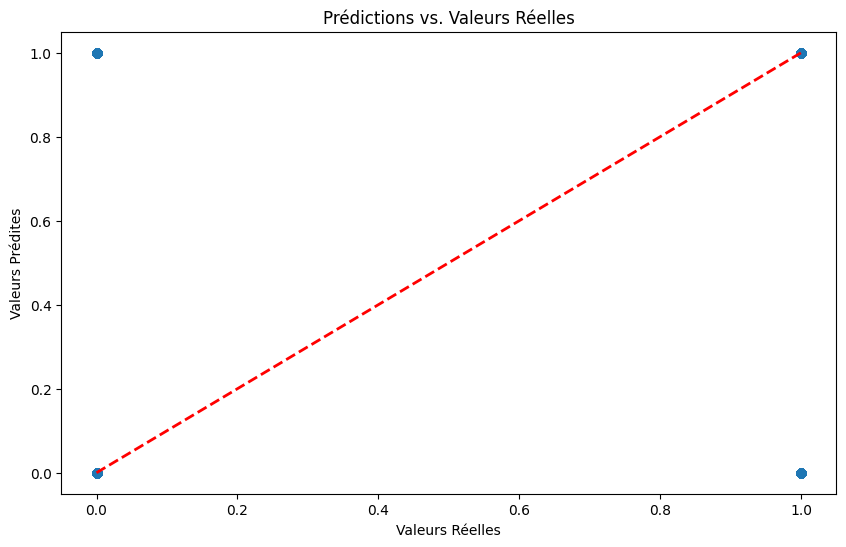

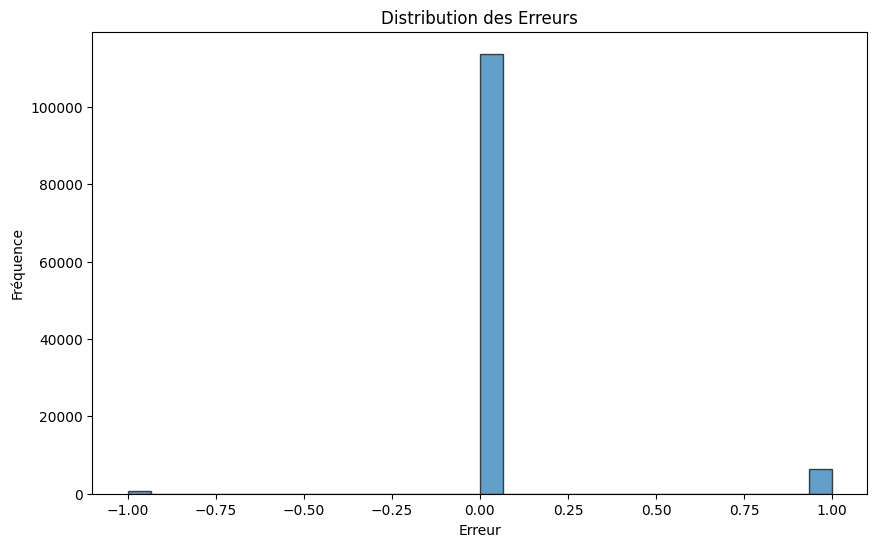

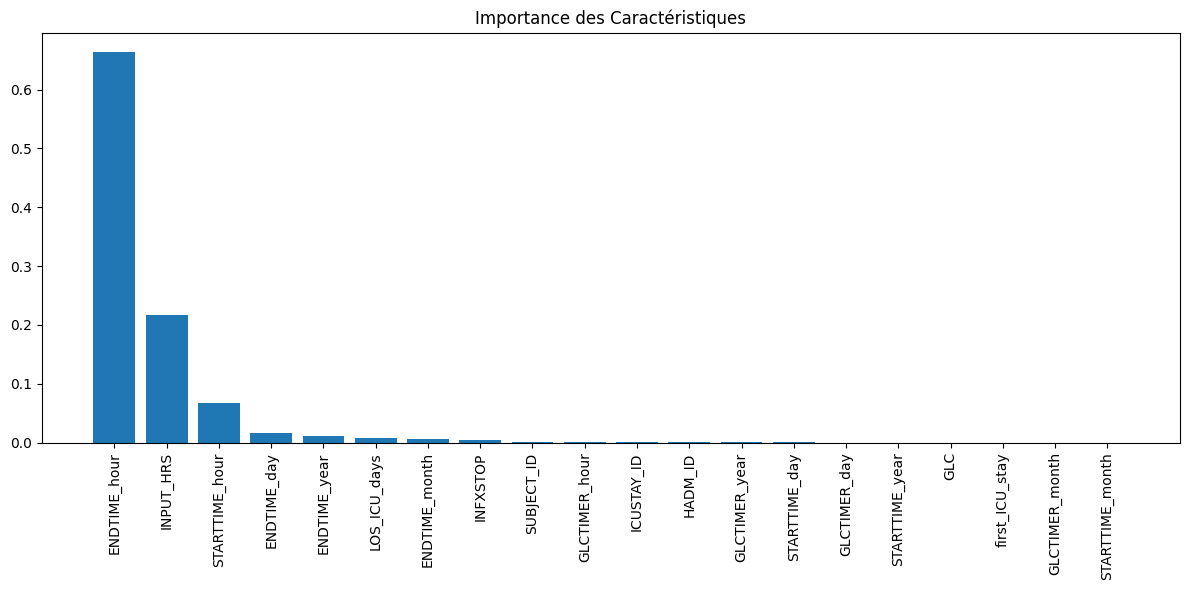

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
# Chargement des données nettoyées
df = pd.read_csv("INC_cleaned.csv")

# Transformation des colonnes de dates en caractéristiques numériques (si nécessaire)
date_columns = ['STARTTIME', 'ENDTIME', 'GLCTIMER']  # Remplacez par les noms réels de vos colonnes de dates

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_hour'] = df[col].dt.hour
        df.drop(col, axis=1, inplace=True)

# Suppression des colonnes non numériques restantes
df = df.select_dtypes(include=['number'])

# Suppression des lignes avec des valeurs manquantes dans la variable cible
df = df.dropna(subset=['INPUT'])

# Transformation de la variable cible en une variable binaire (classification)
threshold = df['INPUT'].median()
df['INPUT_class'] = (df['INPUT'] > threshold).astype(int)
df.drop(columns=['INPUT'], inplace=True)

# Séparation des données en variables explicatives (X) et variable cible (y)
X = df.drop(columns=['INPUT_class'])  # Variables explicatives
y = df['INPUT_class']  # Variable cible (binaire)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation et entraînement du modèle de Gradient Boosting pour la classification
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = gbc_model.predict(X_test_scaled)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm_svm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_svm, figsize=(8, 5))
plt.title("Confusion Matrix -  Gradient Boosting ")
plt.show()




import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Prédictions vs. Valeurs Réelles')
plt.show()



errors = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Erreur')
plt.ylabel('Fréquence')
plt.title('Distribution des Erreurs')
plt.show()

import numpy as np
importances = gbc_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.title('Importance des Caractéristiques')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


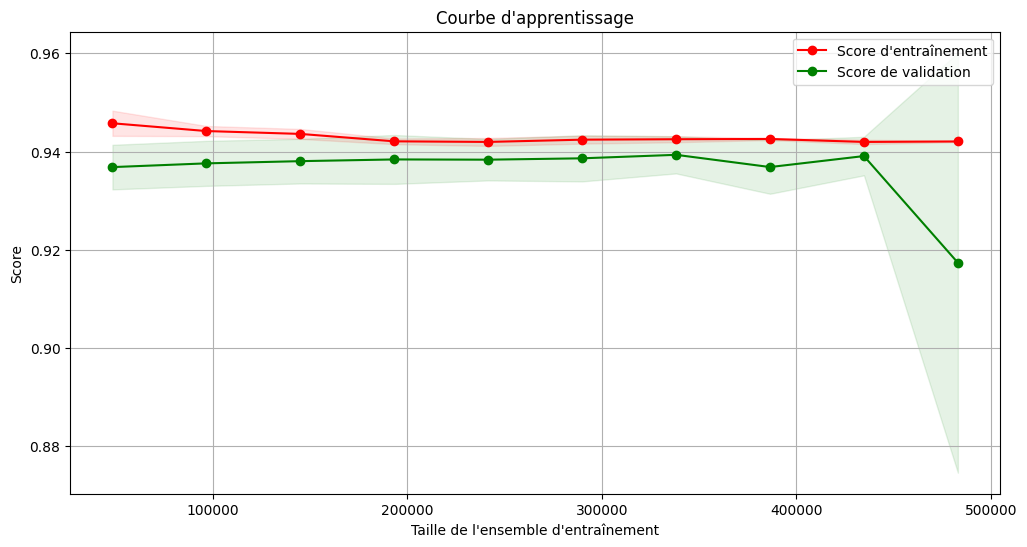

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gbc_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.title('Courbe d\'apprentissage')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label='Score d\'entraînement')
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label='Score de validation')

plt.legend(loc='best')
plt.show()


Accuracy: 0.9332604572971271
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96    111927
           1       0.64      0.20      0.31      8826

    accuracy                           0.93    120753
   macro avg       0.79      0.60      0.64    120753
weighted avg       0.92      0.93      0.92    120753

Confusion Matrix:
[[110912   1015]
 [  7044   1782]]


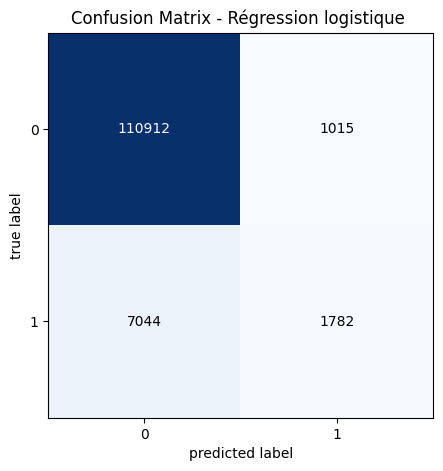

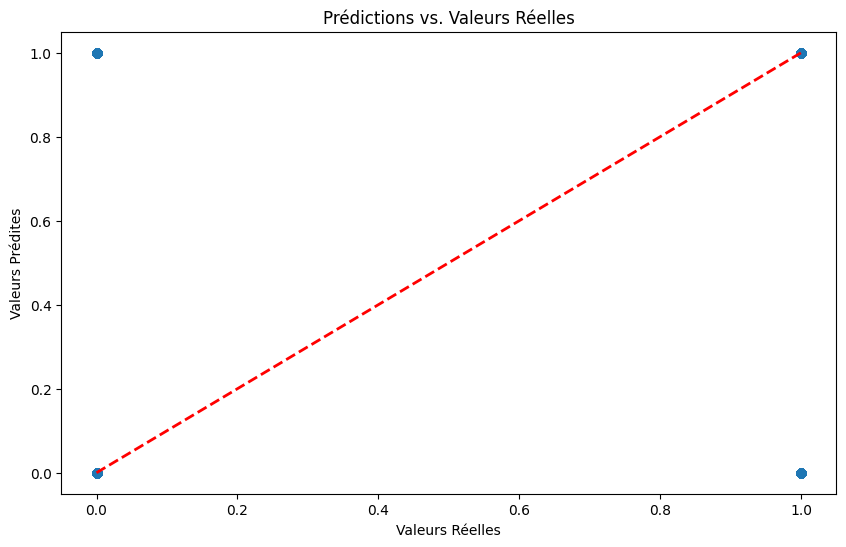

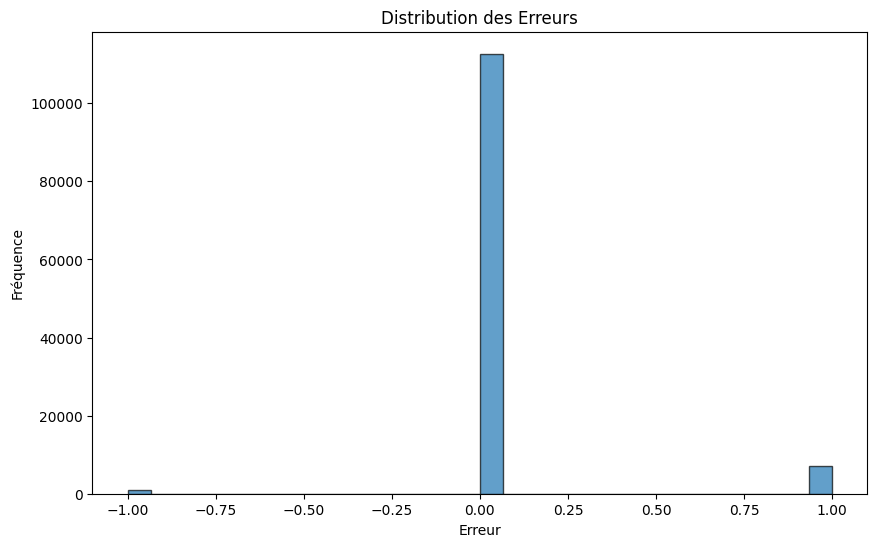

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

# Chargement des données nettoyées
df = pd.read_csv("INC_cleaned.csv")

# Transformation des colonnes de dates en caractéristiques numériques (si nécessaire)
date_columns = ['STARTTIME', 'ENDTIME', 'GLCTIMER']  # Remplacez par les noms réels de vos colonnes de dates

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_hour'] = df[col].dt.hour
        df.drop(col, axis=1, inplace=True)

# Suppression des colonnes non numériques restantes
df = df.select_dtypes(include=['number'])

# Suppression des lignes avec des valeurs manquantes dans la variable cible
df = df.dropna(subset=['INPUT'])

# Transformation de la variable cible en une variable binaire (classification)
threshold = df['INPUT'].median()
df['INPUT_class'] = (df['INPUT'] > threshold).astype(int)
df.drop(columns=['INPUT'], inplace=True)

# Séparation des données en variables explicatives (X) et variable cible (y)
X = df.drop(columns=['INPUT_class'])  # Variables explicatives
y = df['INPUT_class']  # Variable cible (binaire)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation et entraînement du modèle de régression logistique
logistic_regression_model = LogisticRegression(max_iter=500)
logistic_regression_model.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = logistic_regression_model.predict(X_test_scaled)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm_svm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_svm, figsize=(8, 5))
plt.title("Confusion Matrix - Régression logistique ")
plt.show()




import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Prédictions vs. Valeurs Réelles')
plt.show()



errors = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Erreur')
plt.ylabel('Fréquence')
plt.title('Distribution des Erreurs')
plt.show()






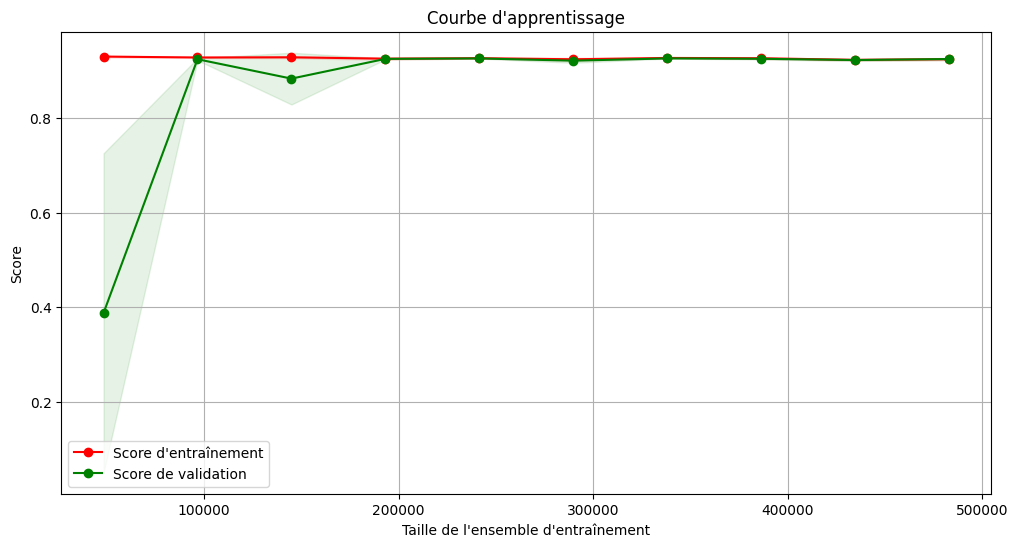

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(logistic_regression_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.title('Courbe d\'apprentissage')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label='Score d\'entraînement')
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label='Score de validation')

plt.legend(loc='best')
plt.show()


Erreur quadratique moyenne (MSE): 0.06470232623620117
Coefficient de détermination (R²): 0.04046164122903906
Accuracy: 0.9352976737637988
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97    111972
           1       0.55      0.58      0.56      8781

    accuracy                           0.94    120753
   macro avg       0.76      0.77      0.76    120753
weighted avg       0.94      0.94      0.94    120753

Confusion Matrix:
[[107878   4094]
 [  3719   5062]]


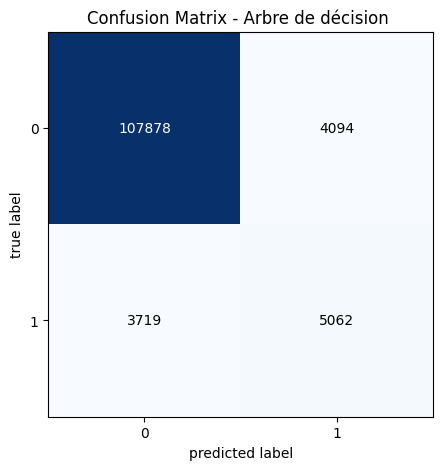

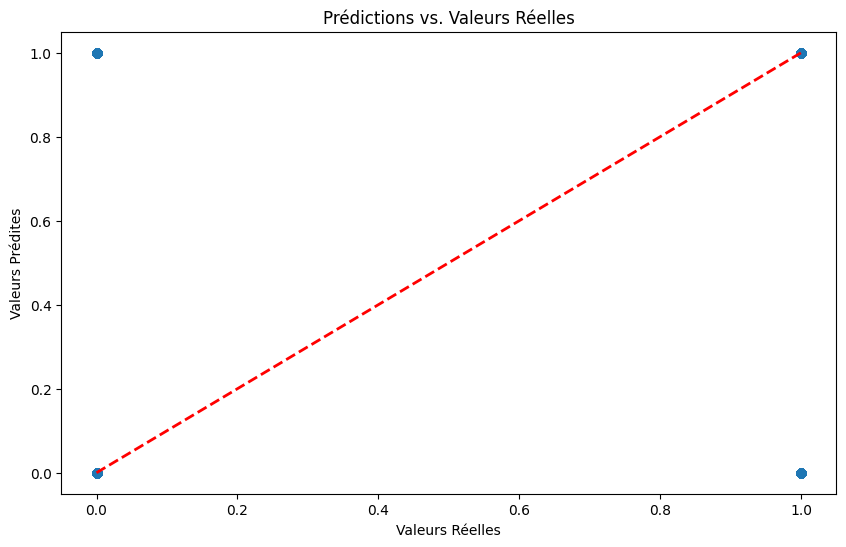

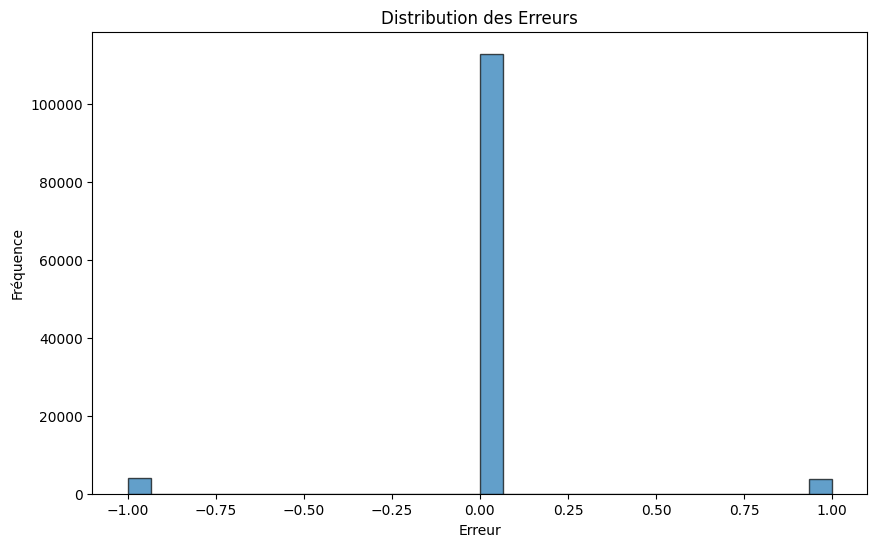

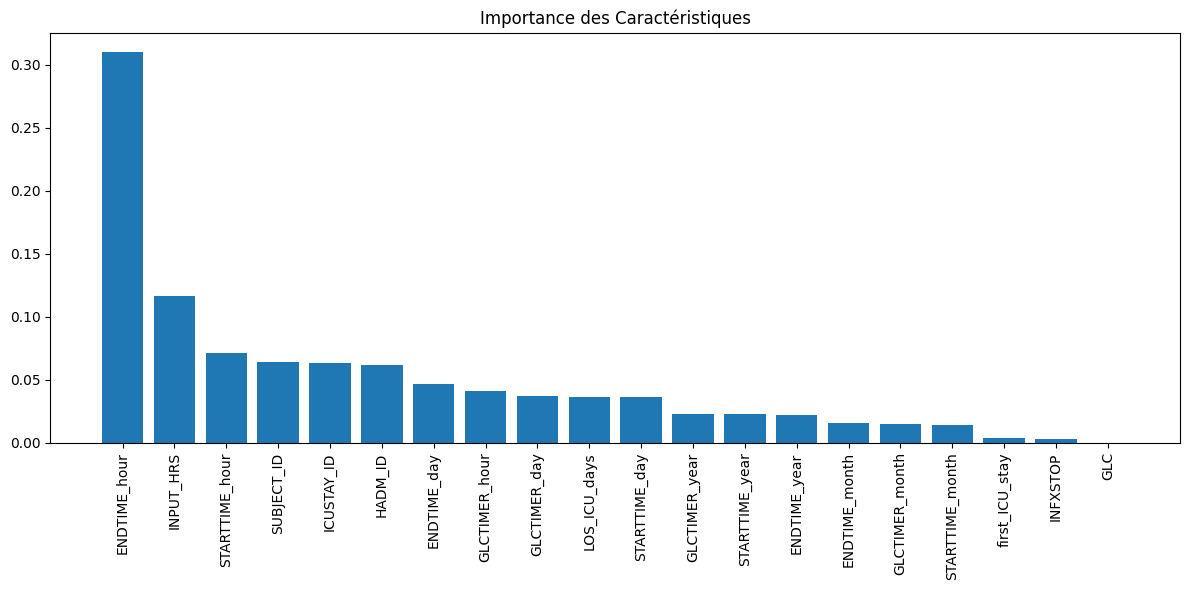

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
# Chargement des données nettoyées
df = pd.read_csv("INC_cleaned.csv")

# Transformation des colonnes de dates en caractéristiques numériques (si nécessaire)
date_columns = ['STARTTIME', 'ENDTIME', 'GLCTIMER']  # Remplacez par les noms réels de vos colonnes de dates

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_hour'] = df[col].dt.hour
        df.drop(col, axis=1, inplace=True)

# Suppression des colonnes non numériques restantes
df = df.select_dtypes(include=['number'])

# Suppression des lignes avec des valeurs manquantes dans la variable cible
df = df.dropna(subset=['INPUT'])

# Transformation de la variable cible en une variable binaire (classification)
threshold = df['INPUT'].median()
df['INPUT_class'] = (df['INPUT'] > threshold).astype(int)
df.drop(columns=['INPUT'], inplace=True)

# Séparation des données en variables explicatives (X) et variable cible (y)
X = df.drop(columns=['INPUT_class'])  # Variables explicatives
y = df['INPUT_class']  # Variable cible (binaire)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation et entraînement du modèle d'arbre de décision pour la classification
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = tree_classifier.predict(X_test_scaled)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erreur quadratique moyenne (MSE):", mse)
print("Coefficient de détermination (R²):", r2)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm_svm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_svm, figsize=(8, 5))
plt.title("Confusion Matrix - Arbre de décision ")
plt.show()




import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Prédictions vs. Valeurs Réelles')
plt.show()



errors = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Erreur')
plt.ylabel('Fréquence')
plt.title('Distribution des Erreurs')
plt.show()

import numpy as np
importances = tree_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.title('Importance des Caractéristiques')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

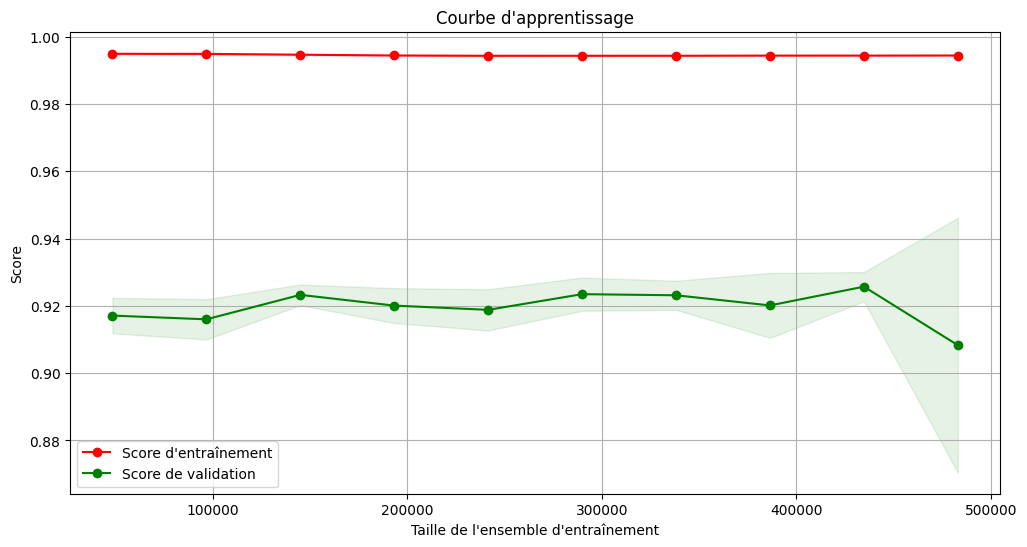

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(tree_classifier, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.title('Courbe d\'apprentissage')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label='Score d\'entraînement')
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label='Score de validation')

plt.legend(loc='best')
plt.show()


Accuracy: 0.949044744229957
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    111927
           1       0.72      0.50      0.59      8826

    accuracy                           0.95    120753
   macro avg       0.84      0.74      0.78    120753
weighted avg       0.94      0.95      0.94    120753

Confusion Matrix:
[[110188   1739]
 [  4414   4412]]


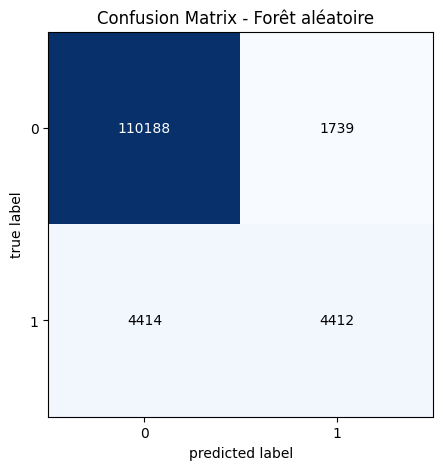

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
# Chargement des données nettoyées
df = pd.read_csv("INC_cleaned.csv")

# Transformation des colonnes de dates en caractéristiques numériques (si nécessaire)
date_columns = ['STARTTIME', 'ENDTIME', 'GLCTIMER']  # Remplacez par les noms réels de vos colonnes de dates

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_hour'] = df[col].dt.hour
        df.drop(col, axis=1, inplace=True)

# Suppression des colonnes non numériques restantes
df = df.select_dtypes(include=['number'])

# Suppression des lignes avec des valeurs manquantes dans la variable cible
df = df.dropna(subset=['INPUT'])

# Transformation de la variable cible en une variable binaire (classification)
threshold = df['INPUT'].median()
df['INPUT_class'] = (df['INPUT'] > threshold).astype(int)
df.drop(columns=['INPUT'], inplace=True)

# Séparation des données en variables explicatives (X) et variable cible (y)
X = df.drop(columns=['INPUT_class'])  # Variables explicatives
y = df['INPUT_class']  # Variable cible (binaire)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation et entraînement du modèle de forêt aléatoire
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = random_forest_model.predict(X_test_scaled)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm_svm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_svm, figsize=(8, 5))
plt.title("Confusion Matrix - Forêt aléatoire  ")
plt.show()


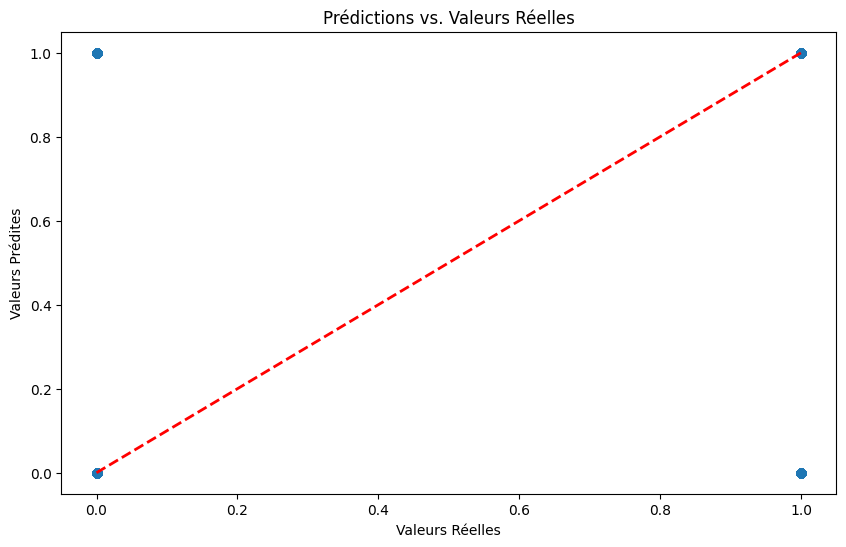

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Prédictions vs. Valeurs Réelles')
plt.show()


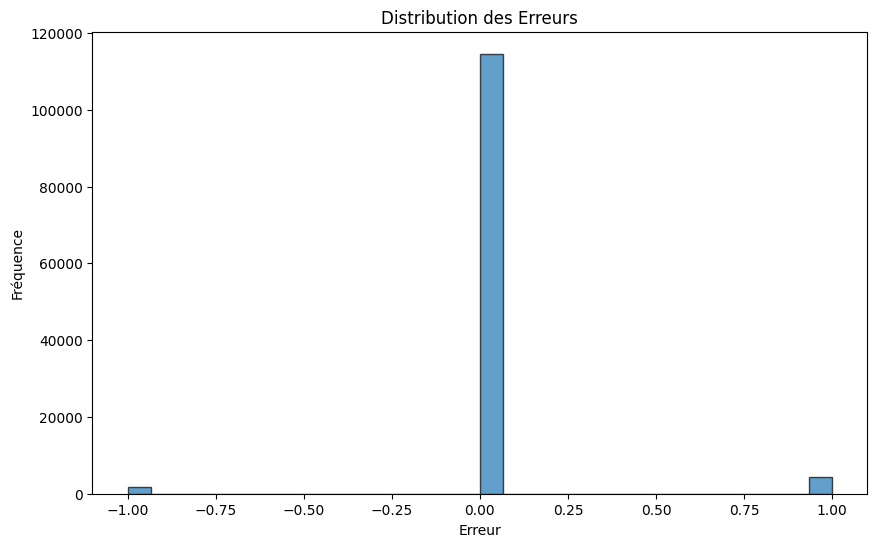

In [ ]:
errors = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Erreur')
plt.ylabel('Fréquence')
plt.title('Distribution des Erreurs')
plt.show()


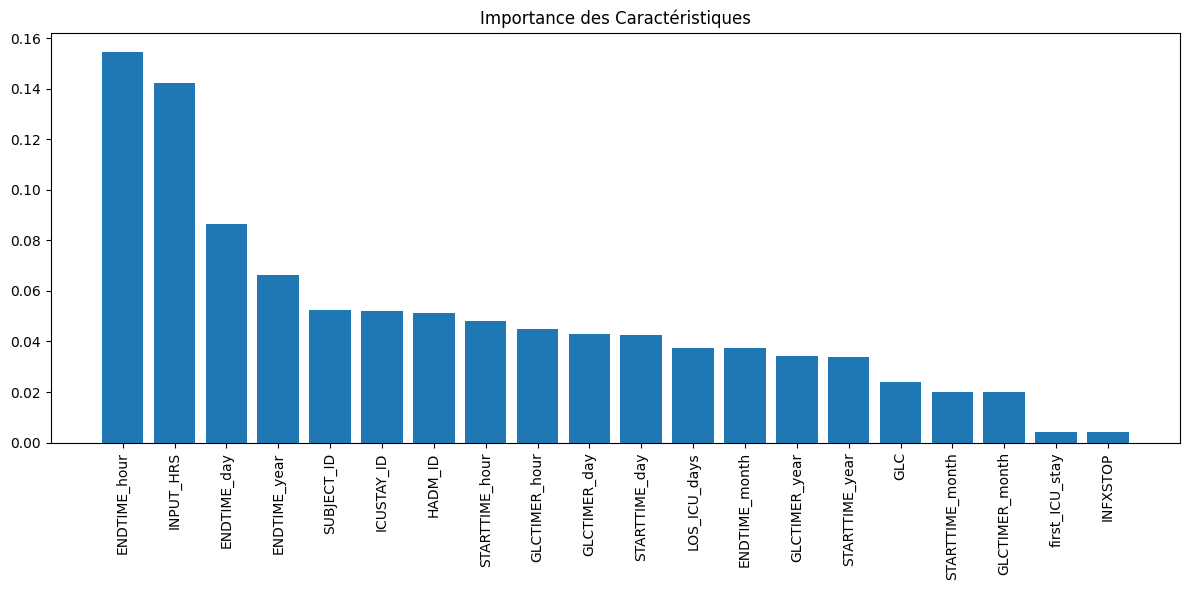

In [ ]:
import numpy as np
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.title('Importance des Caractéristiques')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


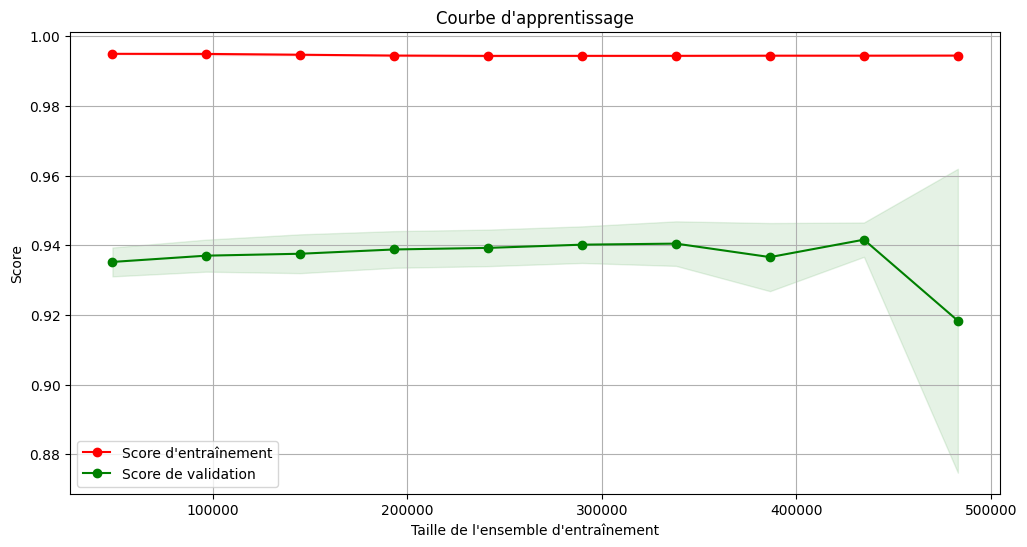

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(random_forest_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.title('Courbe d\'apprentissage')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label='Score d\'entraînement')
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label='Score de validation')

plt.legend(loc='best')
plt.show()
